# Расчет дифференциальных уравнений на графах

## Задача 1. Моделирование транспортных потоков

### Часть 1. Модель транспортного потока

Для моделирования транспортных потоков будем использовать макроскопический подход.

Уравнения, описывающие поведение потока на автостраде:
$$
\begin{cases}
    & \rho_t + (\rho u)_x = 0 \\
    & (\rho \omega)_t + (\rho u \omega)_x = 0 \\
    & u = V(\rho, \omega)
\end{cases}
$$

Фундаментальная диаграмма задается как:
$$
\begin{align*}
    & Q_{\alpha, \lambda, p}(\rho) = \alpha \left(
        a + (b-a) \frac{\rho}{\rho_{max}} - \sqrt{1 + y^2}
    \right) \\
    & a = \sqrt{1 + \lambda^2 p^2} \\
    & b = \sqrt{1 + \lambda^2 (1 - p)^2} \\
    & y = \lambda \left( \frac{\rho}{\rho_{max}} - p \right)
\end{align*}
$$
Положим, что параметры фундаментальной диаграммы зависят от $\omega$:
$$
\begin{align*}
    & \alpha = \alpha(\omega)
    & \lambda = \lambda(\omega)
    & p = p(\omega)
\end{align*}
$$
Алгоритм определения этой зависимсоти будет дан позже.

Скорость потока задается следующим образом:
$$
V(\rho, \omega) = \begin{cases}
    & \frac{Q(\rho, \omega)}{\rho} & ,\rho > 0 \\
    & Q_\rho(0, \omega) & ,\rho = 0
\end{cases}
$$

Найдем $Q_\rho(\rho)$:
$$
Q_\rho(\rho) = \alpha (b - a) \frac{1}{\rho_{max}} - \alpha \frac{y(\rho)}{\sqrt{1 + y(\rho)^2}} \frac{\lambda}{\rho_{max}}
$$

Заметим, что:
$$
\begin{align*}
    & y(0) = -\lambda p \\
    & \sqrt{1 + y(0)^2} = \sqrt{1 + \lambda^2 p^2} = a
\end{align*}
$$

Таким образом:
$$
Q_\rho(0, \omega) = \frac{\alpha}{\rho_{max}} \left(
    b - a + \frac{\lambda^2 p}{a}
\right)
$$

Также нам понадобятся следующие величины:
$$
\begin{align*}
    & \rho_c = \mathrm{argmax}_{\rho}(Q_{\alpha, \lambda, p}(\rho)) \\
    & Q^{max}_{\alpha, \lambda, p} = Q_{\alpha, \lambda, p}(\rho_c)
\end{align*}
$$

При этом:
$$
\begin{align*}
    & \rho_c = \rho_{max} \left( p + \frac{1}{\lambda} \cdot \frac{(b-a)}{\sqrt{\lambda^2 - (b-a)^2}} \right) \\
\end{align*}
$$

### Часть 2. Разностная схема

Сделаем замену $y := \rho \omega$.
Тогда система уравнений может быть переписана в виде:
$$
\begin{cases}
    & \rho_t + (\rho u)_x = 0 \\
    & y_t + (u y)_x = 0 \\
    & u = V(\rho, y/\rho)
\end{cases}
$$

Обозначим $\mathbf{U} = (\rho, y)$ и $\mathbf{F}(\mathbf{U}) = (\rho u, u y)$. <br>
Тогда уравнения можно записать так:
$$
\mathbf{U}_t + \mathbf{F}_x(\mathbf{U}) = 0
$$

Для численного приближения данной системы будем использовать метод Годунова.
Основная идея в применении следующей аппроксимации:
$$
\mathbf{U}^n_i \approx \frac{1}{\Delta x} \int\limits_{x_{i - 1/2}}^{x_{i + 1/2}} \mathbf{U}(x, t_n) dx
$$

Конечно-разностная аппроксимация исходных уравнений выглядит как:
$$
\mathbf{U}^{n+1}_i = \mathbf{U}^{n}_i - \frac{\Delta t}{\Delta x} \left(
    \mathbf{F}^n_{i+1/2} - \mathbf{F}^n_{i-1/2}
\right)
$$

Где значения потока $\mathbf{F}$ в полуцелых узлах записывается как:
$$
\begin{align*}
    & \mathbf{F}^n_{i + 1/2} = \mathbf{F}( \mathcal{R}( \mathbf{U}^n_{i} , \mathbf{U}^n_{i+1} ) ) \\
    & \mathbf{F}^n_{i - 1/2} = \mathbf{F}( \mathcal{R}( \mathbf{U}^n_{i-1} , \mathbf{U}^n_{i} ) )
\end{align*}
$$
Где $\mathcal{R}(\mathbf{U}_L, \mathbf{U}_R)$ обозначает решение задачи Римана для начальных состояний $\mathbf{U}_L$  и $\mathbf{U}_R$

Перепишем эти уравнения покомпонентно:
$$
\begin{align*}
    & \rho^{n+1}_j = \rho^{n}_j - \frac{\Delta t}{\Delta x} \left( Q^{n}_{j+1/2} - Q^{n}_{j-1/2} \right) \\
    & y^{n+1}_j = y^{n}_j - \frac{\Delta t}{\Delta x} \left( \omega^n_{j} Q^{n}_{j+1/2} - \omega^n_{j-1} Q^{n}_{j-1/2} \right)
\end{align*}
$$
Где $\omega^n_j = y^n_j / \rho^n_j$

Опишем решение задачи Римана.<br>
"Входной" и "выходной" потоки обозначим как $\mathbf{U}_L = (\rho_L, \rho_L \omega_L)$ и $\mathbf{U}_R = (\rho_R, \rho_R \omega_R)$ соответственно.

Используемое нами решение основано на функциях "отправки" и "получения":
$$
\begin{align*}
    & S(\rho_L, u_L, \omega_L) = \begin{cases}
        & \rho_L u_L 
        &,\rho_L \leq \rho_c(\omega_L) \\
        & Q^{max}_{\omega_L}
        &,\rho_L > \rho_c(\omega_L)
    \end{cases} \\
    & R(\rho_M, u_M, \omega_L) = \begin{cases}
        & Q^{max}_{\omega_L}
        &,\rho_M \leq \rho_c(\omega_L) \\
        & \rho_M u_M
        &,\rho_M > \rho_c(\omega_L)
    \end{cases}
\end{align*}
$$
Где $\rho_c(\omega_L)$ критическая плотность при заданном параметре $\omega_L$.

Промежуточные значения плотности и скорости задаются как:
$$
\begin{align*}
    & \rho_M(\omega_L, u_R) = \mathrm{argmin}_\rho \left( u_R - V(\rho, \omega_L)\right) \\
    & u_M(\omega_L, u_R) = \min \left\{ V(0,\omega_L), u_R \right\}
\end{align*}
$$

Таким образом, промежуточные значения потока вычисляются следующим образом:
$$
\mathcal{R}(\mathbf{U}_L, \mathbf{U}_R) = \min \left\{
    S(\rho_L, u_L, \omega_L), R(\rho_M, u_M, \omega_L) 
\right\}
$$

### Часть 3. Алгоритм

Опишем алгоритм:
1. Находим параметр $\omega$:
    $$
    \omega^n_j = \frac{y^n_j}{\rho^n_j}
    $$
    Где $j=1,\ldots,N$
    <br>
    Учитываем граничные условия при помощи "фантомныъ" клеток $(\rho^n_{0}, \omega^n_{0})$ и $(\rho^n_{N+1}, \omega^n_{N+1})$
    
1. Находим скорости в узлах:
    $$
        u^n_{j} = V(\rho^n_j, \omega^n_j)
    $$
    Где $j=0 \ldots, N+1$
    <br>
    
1. Находим промежуточные скорости:
    $$
    \begin{align*}
        & u^n_{j-1/2} = \min \left\{ V(0, \omega^n_{j-1}), u^n_{j} \right\}
    \end{align*}
    $$
    Где $j=1, \dots, N+1$
    <br>
    
1. Находим промежуточные плотности:
    $$
    \begin{align*}
        & \rho^n_{j-1/2} = \mathrm{argmin}_{\rho} \left( u^n_j - V(\rho, \omega^n_{j-1}) \right)
    \end{align*}
    $$
    Где $j=1, \ldots, N+1$
    <br>

2. Находим функции отправки и получения:
    $$
    \begin{align*}
        & S^n_{j-1/2} = S(\rho^n_{j-1}, u^n_{j-1}, \omega^n_{j-1}) \\
        & R^n_{j-1/2} = R(\rho^n_{j-1/2}, u^n_{j-1/2}, \omega^n_{j-1})
    \end{align*}
    $$
    Где $j=1,\ldots,N+1$
    <br>

5. Находим интенсивность потока:
    $$
    Q^n_{j-1/2} = \min \left\{ S^n_{j-1/2}, R^n_{j-1/2} \right\}
    $$
    Где $j=1,\ldots,N+1$
    <br>

6. Находим состояние системы на следующем временном шаге:
    $$
    \begin{align*}
        & \rho^{n+1}_j = \rho^{n}_j - \frac{\Delta t}{\Delta x} \left( Q^{n}_{j+1/2} - Q^{n}_{j-1/2} \right) \\
        & y^{n+1}_j = y^{n}_j - \frac{\Delta t}{\Delta x} \left( \omega^n_{j} Q^{n}_{j+1/2} - \omega^n_{j-1} Q^{n}_{j-1/2} \right)
    \end{align*}
    $$
    Где $j=1,\ldots,N$
8. Возвращаем параметры потока на выходе из ребра $(\omega^{n+1}_N, Q^n_{N+1/2})$.<br>
   Эти параметры потом будут переданы и использованы в узлах графа

### Часть 4. Модель узлов

### Часть X. Реализация

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#### Фундаментальная диаграмма

In [2]:
class FundamentalDiagram:
    def __init__(self, alpha, lmbda, p, rho_max):
        self.calc_alpha = alpha
        self.calc_lambda = lmbda
        self.calc_p = p
        self.rho_max = rho_max
        
    def calc_Q(self, rho, alpha, lmbda, p):
        a = np.sqrt(1 + (lmbda * p)**2)
        b = np.sqrt(1 + (lmbda * (1 - p))**2)
        y = lmbda * (rho / self.rho_max - p)
        
        Q = alpha * (a + (b - a) * rho / self.rho_max - np.sqrt(1 + y**2))
        return Q
    
    def Q(self, rho, omega):
        alpha, lmbda, p = self._calc_params(omega)
        return self.calc_Q(rho, alpha, lmbda, p)        
    
    def V(self, rho, omega):
        zero_mask = np.isclose(rho, 0.)
        
        V = np.zeros(rho.shape)
        if len(V[~zero_mask]) != 0:
            V[~zero_mask] = self._calc_V_non_zero(rho[~zero_mask], omega[~zero_mask])
        if len(V[zero_mask]) != 0:
            V[zero_mask] = self._calc_V_zero(rho[zero_mask], omega[zero_mask])
        return V
    
    def Q_max(self, rho, omega):
        rho_c = self.rho_c(rho, omega)
        q_max = self.Q(rho_c, omega)
        return q_max
    
    def rho_c(self, rho, omega):
        alpha, lmbda, p = self._calc_params(omega)
        
        a = np.sqrt(1 + (lmbda * p)**2)
        b = np.sqrt(1 + (lmbda * (1 - p))**2)
        y = lmbda * (rho / self.rho_max - p)
        
        numerator = (b - a)
        denominator = lmbda * np.sqrt(lmbda**2 - (b - a)**2)
        addition = np.divide(numerator, denominator, where=denominator!=0)
        
        rho_c = self.rho_max * (p + addition)
        return rho_c
    
    def _calc_params(self, omega):
        alpha = self.calc_alpha(omega)
        lmbda = self.calc_lambda(omega)
        p = self.calc_p(omega)
        return alpha, lmbda, p

    def _calc_V_non_zero(self, rho, omega):
        Q = self.Q(rho, omega)
        return Q / rho
    
    def _calc_V_zero(self, rho, omega):
        alpha, lmbda, p = self._calc_params(omega)
        
        a = np.sqrt(1 + (lmbda * p)**2)
        b = np.sqrt(1 + (lmbda * (1 - p))**2)
        y = lmbda * (rho / self.rho_max - p)
        
        Q_rho = alpha * (b - a + lmbda**2 * p / a) / self.rho_max
        return Q_rho

In [3]:
# alpha = np.vectorize(lambda omega: .3 * (1 - omega / 35.))
# lmbda = np.vectorize(lambda omega: 10. * (1 - omega / 35.))
# p = np.vectorize(lambda omega: .1 * (1 - omega / 35.))
alpha = np.vectorize(lambda omega: .3 * (omega / 35.))
lmbda = np.vectorize(lambda omega: 10. * (omega / 35.))
p = np.vectorize(lambda omega: .1 * (omega / 35.))
rho_max = 0.13
fd = FundamentalDiagram(alpha, lmbda, p, rho_max)

In [4]:
%%time
w = 0.
fd.V(np.array([0.]), np.array([w]))
fd.V(np.array([0.01]), np.array([w]))
fd.rho_c(np.array([0.01]), np.array([w]))
fd.Q_max(np.array([0.01]), np.array([w]))

CPU times: user 593 µs, sys: 148 µs, total: 741 µs
Wall time: 745 µs


array([0.])

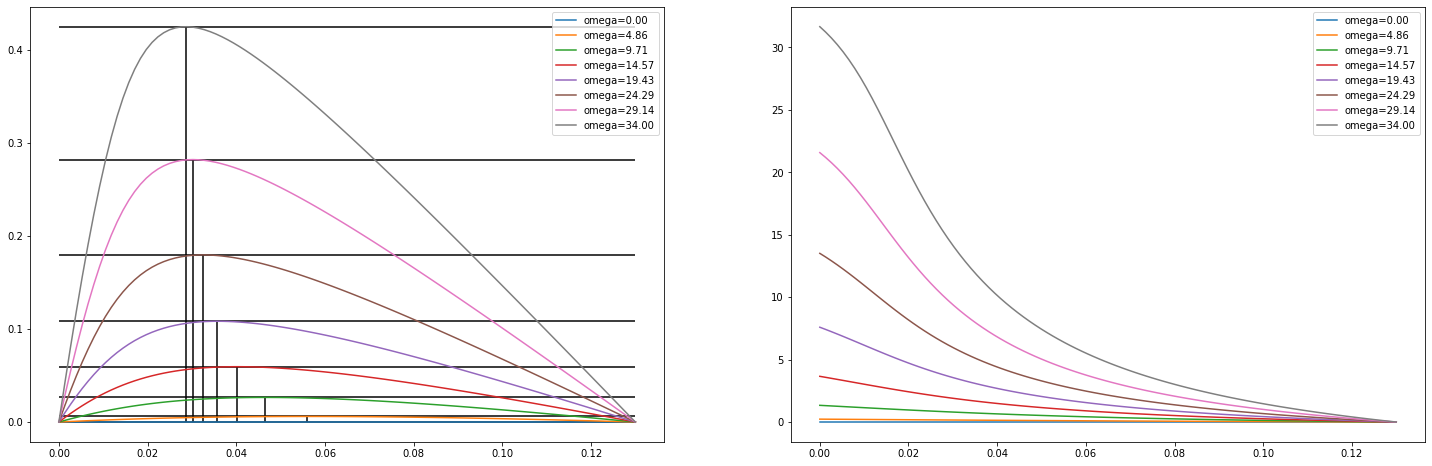

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(25, 8))

rho = np.linspace(0, rho_max, 100)
for w in np.linspace(0., 34., 8):
    
    omega = w * np.ones(rho.shape)
    q = fd.Q(rho, omega)
    v = fd.V(rho, omega)
    rho_c = fd.rho_c(rho, omega)
    q_max = fd.Q_max(rho, omega)
    
    ax[0].plot(rho, q, label=f'omega={w:.2f}')
    ax[0].vlines(x=rho_c[0], ymin=0, ymax=q_max[0])
    ax[0].hlines(y=q_max[0], xmin=0, xmax=rho_max)
    ax[0].legend()

    ax[1].plot(rho, v, label=f'omega={w:.2f}')
    ax[1].legend()
plt.show()

#### Ребро графа

In [228]:
class Edge:
    def __init__(self, fundamental_diagram, length, dx):
        # estimate number of segments
        self.n = int(length / dx)
        self.dx = length / self.n
        # init edge
        self.fd = fundamental_diagram
        self.rho = np.zeros(self.n)
        self.omega = 30. * np.ones(self.n)
    
    def update(self, dt, flow_in, flow_out):
        # init rho
        rho = np.zeros(self.n + 2)
        rho[0] = flow_in[0]
        rho[1:-1] = self.rho
        rho[-1] = flow_out[0]
        #init_omega
        omega = np.zeros(self.n + 2)
        omega[0] = flow_in[1]
        omega[1:-1] = self.omega
        omega[-1] = flow_out[1]
        # calc velocities
        u = self._calc_u(rho, omega)
        # calc u_M, rho_M
        uM = self._calc_uM(rho, omega, u)
        rhoM = self._calc_rhoM(rho, omega, u)
        # calc S
        S = self._calc_S(rho[:-1], u[:-1], omega[:-1])
        # calc R
        R = self._calc_R(rhoM, uM, omega[:-1])
        # calc Q
        Q = np.minimum(S, R)
#         Q = S
        # init y
#         y = self.rho * self.omega
        # update state
        self.rho -= (dt / self.dx) * (Q[1:] - Q[:-1])
#         y -= (dt / self.dx) * self.omega * (Q[1:] - Q[:-1])
#         self.omega = self._calc_omega(self.rho, y)
        # return parameters to node
        return self.omega[-1], Q[-1]
        
    def _calc_omega(self, rho, y):
        zero_mask = np.isclose(rho, 0.)
        new_omega = np.divide(y, rho, where=~zero_mask)
        self.omega[~zero_mask] = new_omega[~zero_mask]
        return self.omega
        
    def _calc_u(self, rho, omega):
        return self.fd.V(rho, omega)
    
    def _calc_uM(self, rho, omega, u):
        omegaL = omega[:-1]
        uR = u[1:]
        uML = self.fd.V(np.zeros(rho[:-1].shape), omegaL)
        return np.minimum(uML, uR)
    
    def _calc_rhoM(self, rho, omega, u):
        omegaL = omega[:-1]
        uR = u[1:]
        
        alpha, lmbda, p = self.fd._calc_params(omegaL)
        a = np.sqrt(1 + (lmbda * p)**2)
        b = np.sqrt(1 + (lmbda * (1 - p))**2)
        rho_max = self.fd.rho_max
        
        xi = alpha * (a + (b-a) * p) - uR * rho_max * p
        delta = (alpha * (b - a) - uR * rho_max) / lmbda
        
        sqrt_arg = -alpha**4 + alpha**2 * (xi**2 + delta**2)
        sqrt_expr = np.zeros(sqrt_arg.shape)
        sqrt_expr = np.sqrt(sqrt_arg, out=sqrt_expr, where=sqrt_arg>=0)
        y = (xi * delta + sqrt_expr) / (alpha**2 - delta**2)
        rho_sol = rho_max * (y + lmbda * p) / lmbda
        return rho_sol

    
    def _calc_S(self, rhoL, uL, omegaL):
        rho_c = self.fd.rho_c(rhoL, omegaL)
        Qmax = self.fd.Q_max(rhoL, omegaL)
        rho_mask = rhoL > rho_c
        # calc S
        S = np.zeros(rhoL.shape)
        S[~rho_mask] = (rhoL * uL)[~rho_mask]
        S[rho_mask] = Qmax[rho_mask]
        return S
    
    def _calc_R(self, rhoM, uM, omegaL):
        rho_c = self.fd.rho_c(rhoM, omegaL)
        Qmax = self.fd.Q_max(rhoM, omegaL)
        rho_mask = rhoM > rho_c
        # calc R
        R = np.zeros(rhoM.shape)
        R[~rho_mask] = Qmax[~rho_mask]
        R[rho_mask] = (rhoM * uM)[rho_mask]
        return R

In [229]:
length = 1000.
edge = Edge(fd, length, 10.)

CPU times: user 1.48 s, sys: 1e+03 ns, total: 1.48 s
Wall time: 1.48 s


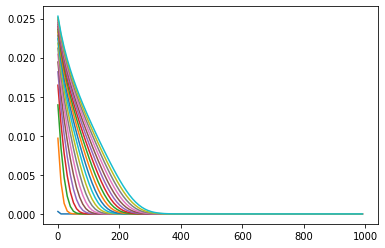

In [231]:
%%time
x = np.linspace(0, length, edge.n)
for i in range(1000):
    edge.update(.01, [.1, 30.], [.13, 30.])
    if i%50 == 0:
        plt.plot(x[:-1], edge.rho[:-1])

In [182]:
edge.rho

array([0.02545446, 0.02329842, 0.02157107, 0.02009377, 0.01878666,
       0.01760331, 0.01651323, 0.01549495, 0.01453265, 0.01361431,
       0.01273063, 0.01187436, 0.01103993, 0.01022318, 0.00942122,
       0.00863247, 0.00785658, 0.00709452, 0.00634862, 0.0317832 ])

In [77]:
edge.omega

array([30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30., 30., 30., 30., 30., 30.])

#### Вершина графа

In [11]:
class Node:
    def __init__(self):
        pass